# Gaussian process from scratch

In [1]:
# Load modules

import gp

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Target function

def y(x):
    return 5 * np.sin(np.pi / 15 * x) * np.exp(-x / 50)

In [3]:
# Simulation settings

# Sample size
n = 50

# Generate x and y
x0 = np.random.uniform(0, 100, n)
y0 = y(x0) + np.random.normal(0, 1, n)

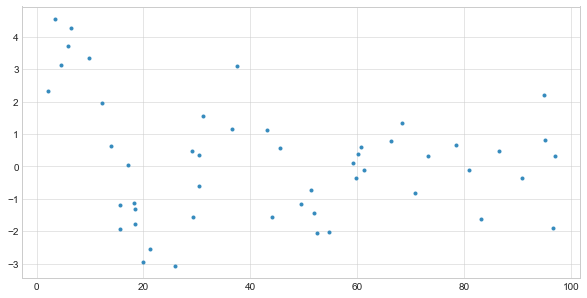

In [4]:
# plot function

def plot(x0, y0, x1=None, mu=None, std=None, g=None):
    # Plot original points
    plt.figure(figsize=(10, 5))
    plt.plot(x0, y0, '.')

    # Plot predicted points
    if all([e is not None for e in (x1, mu, std, gp)]):
        plt.plot(x1, mu, alpha=0.5)
        plt.fill_between(x1, mu-std, mu+std, alpha=0.2)    
        plt.title('theta_1=%.3f, theta_2=%.3f, theta_3=%.3f' % tuple(g.kernel.params))

plot(x0, y0)

In [5]:
# Kernel definition

# Initial parameters and its ranges
params = [5, 1, 5]
params_ranges = np.array([[1, 10], [1, 10], [1, 10]])

kernel = gp.Kernel(params, params_ranges)

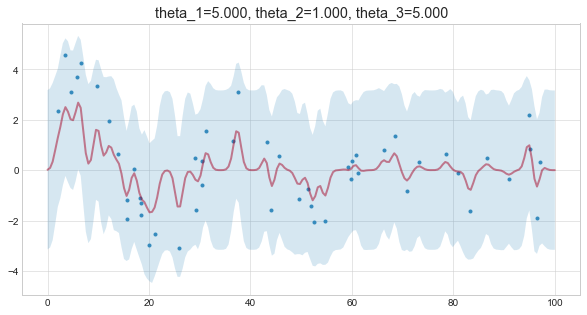

In [6]:
# GP model definition

model = gp.GP(y0, x0, kernel)


# train without optimizing hyper-parameters
model.train()

# Predict
x1 = np.linspace(0, 100, 200)
mu, std = model.predict(x1)

# Plot
plot(x0, y0, x1, mu, std, model)

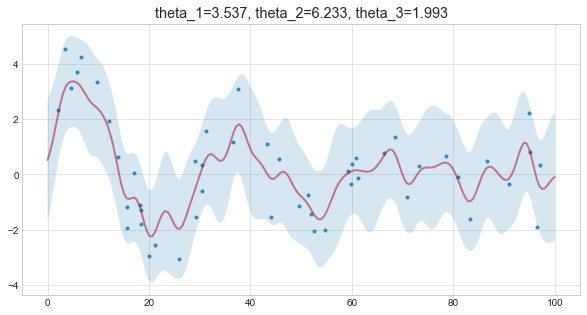

In [7]:
# Optimization (MCMC version)
model.optimize_mcmc(n_iter=5000)

# Predict
mu, std = model.predict(x1)

# Plot
plot(x0, y0, x1, mu, std, model)